In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [2]:
df = pd.read_csv('../datasets/automobile.csv')

In [3]:
df.head()

,Normalized-losses,Make,Fuel-type,Aspiration,Num-of-doors,Body-style,Drive-wheels,Engine-location,Wheel-base,Length,...,Fuel-system,Bore,Stroke,Compression-ratio,Horsepower,Peak-rpm,City-mpg,Highway-mpg,Price,Symboling
0,168,toyota,gas,std,two,sedan,rwd,front,94.5,168.7,...,2bbl,3.19,3.03,9.0,70,4800,29,34,8058,1
1,113,mazda,gas,std,four,sedan,fwd,front,93.1,166.8,...,2bbl,3.08,3.15,9.0,68,5000,31,38,7395,1
2,87,toyota,gas,std,two,hatchback,fwd,front,95.7,158.7,...,2bbl,3.05,3.03,9.0,62,4800,35,39,5348,1
3,125,mitsubishi,gas,std,four,sedan,fwd,front,96.3,172.4,...,2bbl,3.35,3.46,8.5,88,5000,25,32,6989,1
4,148,dodge,gas,turbo,?,sedan,fwd,front,93.7,157.3,...,mpfi,3.03,3.39,7.6,102,5500,24,30,8558,1


In [4]:
df.shape

(205, 26)

In [5]:
df.dtypes

Normalized-losses     object
Make                  object
Fuel-type             object
Aspiration            object
Num-of-doors          object
Body-style            object
Drive-wheels          object
Engine-location       object
Wheel-base           float64
Length               float64
Width                float64
Height               float64
Curb-weight            int64
Engine-type           object
Num-of-cylinders      object
Engine-size            int64
Fuel-system           object
Bore                  object
Stroke                object
Compression-ratio    float64
Horsepower            object
Peak-rpm              object
City-mpg               int64
Highway-mpg            int64
Price                 object
Symboling              int64
dtype: object

In [6]:
# create NaN data
num_nan = 10
missing_x = np.random.randint(0, df.shape[0], (num_nan, 1))
missing_y = np.random.randint(0, df.shape[1], (num_nan, 1))

for i, j in zip(missing_x, missing_y):
    df.iloc[i, j] = np.nan

In [7]:
df[df.isnull().any(axis=1)]

,Normalized-losses,Make,Fuel-type,Aspiration,Num-of-doors,Body-style,Drive-wheels,Engine-location,Wheel-base,Length,...,Fuel-system,Bore,Stroke,Compression-ratio,Horsepower,Peak-rpm,City-mpg,Highway-mpg,Price,Symboling
1,113,mazda,NaN,std,four,sedan,fwd,front,93.1,166.8,...,2bbl,3.08,3.15,9.0,68,5000,31,38.0,7395,1
17,65,toyota,gas,std,four,hatchback,fwd,front,102.4,175.6,...,mpfi,3.31,3.54,8.7,92,4200,27,32.0,11248,-1
57,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,NaN,...,mpfi,3.78,3.15,8.7,160,5300,19,25.0,19045,-1
75,77,toyota,gas,std,four,wagon,fwd,front,95.7,169.7,...,2bbl,3.05,3.03,9.0,62,NaN,31,37.0,6918,0
81,122,nissan,gas,std,four,sedan,fwd,front,94.5,165.3,...,2bbl,3.15,3.29,9.4,69,5200,31,NaN,6849,1
89,153,mitsubishi,gas,turbo,two,hatchback,fwd,front,96.3,173.0,...,NaN,3.17,3.46,7.5,116,5500,23,30.0,9959,3
128,168,toyota,gas,std,two,sedan,rwd,front,94.5,168.7,...,mpfi,3.24,3.08,9.4,112,6600,26,29.0,9298,1
160,83,subaru,gas,std,two,hatchback,NaN,front,93.7,156.9,...,2bbl,3.62,2.36,9.0,69,4900,31,36.0,5118,2
166,?,porsche,gas,std,two,hatchback,rwd,front,98.4,175.7,...,mpfi,3.94,3.11,10.0,288,5750,17,28.0,?,1
183,194,nissan,gas,std,NaN,hatchback,rwd,front,91.3,170.7,...,mpfi,3.43,3.27,9.0,160,5200,19,25.0,17199,3


In [8]:
df.dropna(inplace=True)
df.shape

(195, 26)

In [9]:
X=df.iloc[:,:25]
y=df['Symboling']

In [10]:
X.head(n=10)

,Normalized-losses,Make,Fuel-type,Aspiration,Num-of-doors,Body-style,Drive-wheels,Engine-location,Wheel-base,Length,...,Engine-size,Fuel-system,Bore,Stroke,Compression-ratio,Horsepower,Peak-rpm,City-mpg,Highway-mpg,Price
0,168,toyota,gas,std,two,sedan,rwd,front,94.5,168.7,...,98,2bbl,3.19,3.03,9.0,70,4800,29,34.0,8058
2,87,toyota,gas,std,two,hatchback,fwd,front,95.7,158.7,...,92,2bbl,3.05,3.03,9.0,62,4800,35,39.0,5348
3,125,mitsubishi,gas,std,four,sedan,fwd,front,96.3,172.4,...,122,2bbl,3.35,3.46,8.5,88,5000,25,32.0,6989
4,148,dodge,gas,turbo,?,sedan,fwd,front,93.7,157.3,...,98,mpfi,3.03,3.39,7.6,102,5500,24,30.0,8558
5,150,mazda,gas,std,two,hatchback,rwd,front,95.3,169.0,...,70,4bbl,?,?,9.4,101,6000,17,23.0,11845
6,194,nissan,gas,turbo,two,hatchback,rwd,front,91.3,170.7,...,181,mpfi,3.43,3.27,7.8,200,5200,17,23.0,19699
7,?,jaguar,gas,std,two,sedan,rwd,front,102.0,191.7,...,326,mpfi,3.54,2.76,11.5,262,5000,13,17.0,36000
8,128,nissan,gas,std,four,sedan,fwd,front,100.4,181.7,...,181,mpfi,3.43,3.27,9.0,152,5200,17,22.0,13499
9,161,peugot,diesel,turbo,four,sedan,rwd,front,107.9,186.7,...,152,idi,3.7,3.52,21.0,95,4150,28,33.0,16900
10,81,chevrolet,gas,std,four,sedan,fwd,front,94.5,158.8,...,90,2bbl,3.03,3.11,9.6,70,5400,38,43.0,6575


In [11]:
X=pd.get_dummies(X)
X.shape

(195, 452)

In [12]:
X=pd.get_dummies(X)
X.head(n=10)

,Wheel-base,Length,Width,Height,Curb-weight,Engine-size,Compression-ratio,City-mpg,Highway-mpg,Normalized-losses_101,...,Price_9538,Price_9549,Price_9639,Price_9895,Price_9960,Price_9980,Price_9988,Price_9989,Price_9995,Price_?
0,94.5,168.7,64.0,52.6,2169,98,9.0,29,34.0,0,...,0,0,0,0,0,0,0,0,0,0
2,95.7,158.7,63.6,54.5,1985,92,9.0,35,39.0,0,...,0,0,0,0,0,0,0,0,0,0
3,96.3,172.4,65.4,51.6,2365,122,8.5,25,32.0,0,...,0,0,0,0,0,0,0,0,0,0
4,93.7,157.3,63.8,50.6,2191,98,7.6,24,30.0,0,...,0,0,0,0,0,0,0,0,0,0
5,95.3,169.0,65.7,49.6,2380,70,9.4,17,23.0,0,...,0,0,0,0,0,0,0,0,0,0
6,91.3,170.7,67.9,49.7,3139,181,7.8,17,23.0,0,...,0,0,0,0,0,0,0,0,0,0
7,102.0,191.7,70.6,47.8,3950,326,11.5,13,17.0,0,...,0,0,0,0,0,0,0,0,0,0
8,100.4,181.7,66.5,55.1,3095,181,9.0,17,22.0,0,...,0,0,0,0,0,0,0,0,0,0
9,107.9,186.7,68.4,56.7,3252,152,21.0,28,33.0,0,...,0,0,0,0,0,0,0,0,0,0
10,94.5,158.8,63.6,52.0,1909,90,9.6,38,43.0,0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
X=X.drop('Price_?',axis=1)

In [14]:
from collections import Counter
print(Counter(y))

Counter({0: 66, 1: 50, 2: 31, 3: 25, -1: 20, -2: 3})


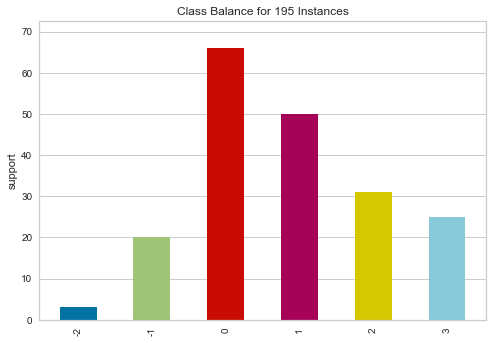

In [15]:
from yellowbrick.target import ClassBalance

visualizer = ClassBalance()
visualizer.fit(y)
plt.xticks(rotation=90)
visualizer.poof()

In [16]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

In [17]:
X = np.array(X)
y = np.array(y)

# scaling
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4,
                                                    shuffle=True, random_state=42)

In [19]:
# learning
kernel = ['linear', 'rbf', 'poly']
clf_SVM = []

for i in kernel:
    svm = SVC(C=1.0, gamma='auto', kernel=i, random_state=42)
    clf_SVM.append(svm.fit(X_train, y_train))

In [20]:
from sklearn import metrics

In [21]:
def calc_metrics(y_test, y_pred):
    pre = metrics.precision_score(y_test, y_pred, average='micro')
    recall = metrics.recall_score(y_test, y_pred, average='micro')
    acc = metrics.accuracy_score(y_test, y_pred)
    f1 = metrics.f1_score(y_test, y_pred, average='micro')
    metrics_list = [pre, recall, acc, f1]
    
    return metrics_list

In [22]:
result = []

for i in range(len(clf_SVM)):
    y_pred = clf_SVM[i].predict(X_test)
    result.append(calc_metrics(y_test, y_pred))

In [23]:
result_df = pd.DataFrame(result, columns=['Precision', 'Recall', 'Acc', 'F-score'])
result_df = result_df.assign(Kernel=kernel)
result_df = result_df[['Kernel', 'Precision', 'Recall', 'Acc', 'F-score']]
round(result_df, 3)

,Kernel,Precision,Recall,Acc,F-score
0,linear,0.615,0.615,0.615,0.615
1,rbf,0.487,0.487,0.487,0.487
2,poly,0.436,0.436,0.436,0.436


In [24]:
result_mlt = pd.melt(result_df, id_vars='Kernel', var_name='Metrics', value_name='values')
result_mlt

,Kernel,Metrics,values
0,linear,Precision,0.615385
1,rbf,Precision,0.487179
2,poly,Precision,0.435897
3,linear,Recall,0.615385
4,rbf,Recall,0.487179
5,poly,Recall,0.435897
6,linear,Acc,0.615385
7,rbf,Acc,0.487179
8,poly,Acc,0.435897
9,linear,F-score,0.615385


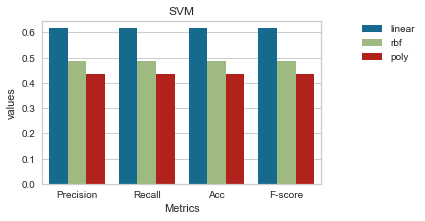

In [25]:
plt.figure(figsize=(5, 3))
sns.barplot(x='Metrics', y='values', hue='Kernel', data=result_mlt)
plt.title('SVM')
plt.legend(loc='best', bbox_to_anchor=(1.35, 1), borderaxespad=0)

In [26]:
from sklearn.model_selection import GridSearchCV

In [27]:
tuning_parm = [
    {'C': [0.01,0.1,1, 10, 100], 'kernel': ['linear'],'gamma': [100,10,1,0.1,0.1,0.001 ]},
    {'C': [0.01,0.1,1, 10, 100], 'kernel': ['rbf'], 'gamma': [100,10,1,0.1,0.1,0.01]},
    {'C': [0.01,0.1,1, 10, 100], 'kernel': ['poly'], 'degree': [2, 3, 4], 'gamma': [100,10,1,0.1,0.1,0.01]}
]

clf_SVM = GridSearchCV(SVC(), tuning_parm, cv=5, scoring='f1_micro', return_train_score=True)

In [28]:
clf_SVM.fit(X_train,y_train)

/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:657: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)
/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid=[{'C': [0.01, 0.1, 1, 10, 100],
                          'gamma': [100, 10, 1, 0.1, 0.1, 0.001],
                          'kernel': ['linear']},
                         {'C': [0.01, 0.1, 1, 10, 100],
                          'gamma': [100, 10, 1, 0.1, 0.1, 0.01],
                          'kernel': ['rbf']},
                         {'C': [0.01, 0.1, 1, 10, 100], 'degree': [2, 3, 4],
                          'gamma': [100, 10, 1, 0.1, 0.1, 0.01],
                          'kernel': ['poly']}],
             pre_dis

In [29]:
grid_df = pd.DataFrame.from_dict(clf_SVM.cv_results_)
grid_df.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,param_kernel,param_degree,params,split0_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.014961,0.007911,0.002211,0.000732,0.01,100,linear,NaN,"{'C': 0.01, 'gamma': 100, 'kernel': 'linear'}",0.703704,...,0.726496,0.056689,1,1.0,1.0,1.0,1.0,1.0,1.0,0.0
1,0.009557,0.000779,0.001687,0.000046,0.01,10,linear,NaN,"{'C': 0.01, 'gamma': 10, 'kernel': 'linear'}",0.703704,...,0.726496,0.056689,1,1.0,1.0,1.0,1.0,1.0,1.0,0.0
2,0.010831,0.000868,0.001819,0.000162,0.01,1,linear,NaN,"{'C': 0.01, 'gamma': 1, 'kernel': 'linear'}",0.703704,...,0.726496,0.056689,1,1.0,1.0,1.0,1.0,1.0,1.0,0.0
3,0.009587,0.000752,0.001667,0.000067,0.01,0.1,linear,NaN,"{'C': 0.01, 'gamma': 0.1, 'kernel': 'linear'}",0.703704,...,0.726496,0.056689,1,1.0,1.0,1.0,1.0,1.0,1.0,0.0
4,0.009594,0.000819,0.001675,0.000044,0.01,0.1,linear,NaN,"{'C': 0.01, 'gamma': 0.1, 'kernel': 'linear'}",0.703704,...,0.726496,0.056689,1,1.0,1.0,1.0,1.0,1.0,1.0,0.0


In [30]:
col = ['mean_train_score', 'params']
grid_df = grid_df[col]
grid_df.sort_values(by=['mean_train_score'], ascending=False)

,mean_train_score,params
0,1.000000,"{'C': 0.01, 'gamma': 100, 'kernel': 'linear'}"
95,1.000000,"{'C': 0.1, 'degree': 4, 'gamma': 0.01, 'kernel..."
97,1.000000,"{'C': 1, 'degree': 2, 'gamma': 10, 'kernel': '..."
98,1.000000,"{'C': 1, 'degree': 2, 'gamma': 1, 'kernel': 'p..."
99,1.000000,"{'C': 1, 'degree': 2, 'gamma': 0.1, 'kernel': ..."
100,1.000000,"{'C': 1, 'degree': 2, 'gamma': 0.1, 'kernel': ..."
101,1.000000,"{'C': 1, 'degree': 2, 'gamma': 0.01, 'kernel':..."
102,1.000000,"{'C': 1, 'degree': 3, 'gamma': 100, 'kernel': ..."
103,1.000000,"{'C': 1, 'degree': 3, 'gamma': 10, 'kernel': '..."
104,1.000000,"{'C': 1, 'degree': 3, 'gamma': 1, 'kernel': 'p..."


In [31]:
clf_SVM.best_estimator_

SVC(C=0.01, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=100, kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [32]:
clf_SVM=SVC(C=0.01,kernel='linear',degree=3,gamma=100)
clf_SVM.fit(X_train, y_train)

SVC(C=0.01, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=100, kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [33]:
# predict label
y_pred = clf_SVM.predict(X_test)

In [34]:
confusion_matrix(y_test, y_pred)

array([[ 0,  0,  2,  0,  0,  0],
       [ 0,  4,  9,  1,  0,  0],
       [ 0,  0, 26,  1,  0,  0],
       [ 0,  0,  5, 11,  0,  0],
       [ 0,  0,  5,  3,  2,  0],
       [ 0,  1,  1,  0,  2,  5]])

In [35]:
acc = accuracy_score(y_test, y_pred)
print('Accuracy =', acc)

Accuracy = 0.6153846153846154


In [36]:
from sklearn.linear_model import LogisticRegression

In [37]:
tuned_parameters = [
    {'C': [0.001,0.01,0.1,1, 10, 100, 1000]}
    ]

In [38]:
score = 'f1'
clf_LR = GridSearchCV(LogisticRegression(), tuned_parameters, cv=5)

In [39]:
clf_LR.fit(X_train, y_train) 

/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:657: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWa

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='warn',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=None,
             param_grid=[{'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [40]:
grid_df = pd.DataFrame.from_dict(clf_LR.cv_results_)
grid_df.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.009904,0.002329,0.003152,0.003479,0.001,{'C': 0.001},0.592593,0.739130,0.565217,0.652174,0.619048,0.632479,0.060010,7
1,0.011849,0.001839,0.000321,0.000066,0.01,{'C': 0.01},0.666667,0.695652,0.565217,0.739130,0.666667,0.666667,0.056750,6
2,0.015388,0.001713,0.000288,0.000044,0.1,{'C': 0.1},0.666667,0.695652,0.608696,0.782609,0.761905,0.700855,0.062670,1
3,0.023080,0.002542,0.000325,0.000053,1,{'C': 1},0.666667,0.695652,0.652174,0.739130,0.714286,0.692308,0.031436,5
4,0.025082,0.004535,0.000343,0.000051,10,{'C': 10},0.703704,0.695652,0.652174,0.739130,0.714286,0.700855,0.028168,1


In [41]:
clf_LR.best_estimator_

LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [42]:
# learning
clf_LR = LogisticRegression(penalty='l2', C=0.1)
clf_LR.fit(X_train, y_train)
y_pred = clf_LR.predict(X_test)

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [43]:
confusion_matrix(y_test, y_pred)

array([[ 2,  0,  0,  0,  0,  0],
       [ 0, 11,  0,  1,  0,  2],
       [ 2,  0, 23,  1,  1,  0],
       [ 1,  0,  2, 11,  2,  0],
       [ 3,  0,  2,  2,  2,  1],
       [ 0,  1,  0,  0,  1,  7]])

In [44]:
acc = accuracy_score(y_test, y_pred)
print('Accuracy =', acc)

Accuracy = 0.717948717948718


In [45]:
from sklearn.neighbors import KNeighborsClassifier

[1] score: 0.67
[2] score: 0.56
[3] score: 0.55
[4] score: 0.53
[5] score: 0.49
[6] score: 0.50
[7] score: 0.37
[8] score: 0.37
[9] score: 0.35
[10] score: 0.32
[11] score: 0.35
[12] score: 0.33
[13] score: 0.37
[14] score: 0.35
[15] score: 0.35
[16] score: 0.37
[17] score: 0.40
[18] score: 0.40
[19] score: 0.41
[20] score: 0.45
[21] score: 0.44
[22] score: 0.45
[23] score: 0.45
[24] score: 0.45
[25] score: 0.45
[26] score: 0.41
[27] score: 0.41
[28] score: 0.38
[29] score: 0.38
[30] score: 0.35


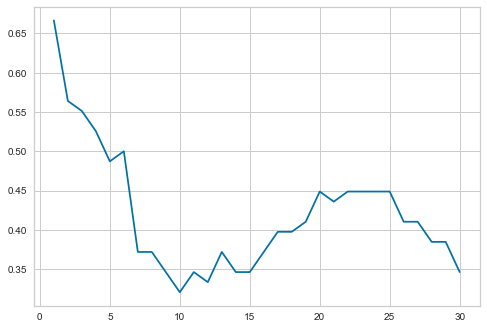

In [46]:
list_score = []
list_nn = []
for k in range(1,31):
    knc_brute = KNeighborsClassifier(n_neighbors=k,algorithm='brute')
    clf=knc_brute
    clf.fit(X_train,y_train)
    y_pred=clf.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    list_score.append(acc)
    list_nn.append(k)
    print("[%d] score: {:.2f}".format(acc) % k)
    
plt.plot(list_nn, list_score)

[1] score: 0.67
[2] score: 0.56
[3] score: 0.55
[4] score: 0.53
[5] score: 0.49
[6] score: 0.50
[7] score: 0.37
[8] score: 0.37
[9] score: 0.35
[10] score: 0.32
[11] score: 0.35
[12] score: 0.33
[13] score: 0.37
[14] score: 0.35
[15] score: 0.35
[16] score: 0.37
[17] score: 0.40
[18] score: 0.40
[19] score: 0.41
[20] score: 0.45
[21] score: 0.44
[22] score: 0.45
[23] score: 0.45
[24] score: 0.45
[25] score: 0.45
[26] score: 0.41
[27] score: 0.41
[28] score: 0.38
[29] score: 0.38
[30] score: 0.35


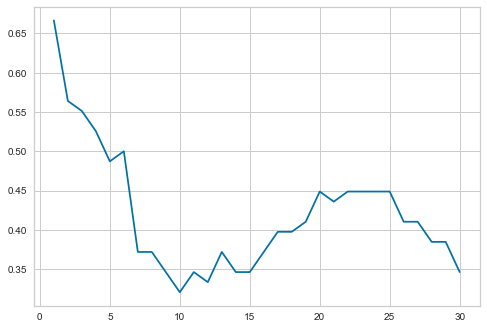

In [47]:
list_score = []
list_nn = []
for k in range(1,31):
    knc_ball = KNeighborsClassifier(n_neighbors=k,algorithm='ball_tree')
    clf = knc_ball
    clf.fit(X_train,y_train)
    y_pred=clf.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    list_score.append(acc)
    list_nn.append(k)
    print("[%d] score: {:.2f}".format(acc) % k)
    
plt.plot(list_nn, list_score)

[1] score: 0.67
[2] score: 0.56
[3] score: 0.55
[4] score: 0.53
[5] score: 0.49
[6] score: 0.50
[7] score: 0.37
[8] score: 0.37
[9] score: 0.35
[10] score: 0.32
[11] score: 0.35
[12] score: 0.33
[13] score: 0.37
[14] score: 0.35
[15] score: 0.35
[16] score: 0.37
[17] score: 0.40
[18] score: 0.40
[19] score: 0.41
[20] score: 0.45
[21] score: 0.44
[22] score: 0.45
[23] score: 0.45
[24] score: 0.45
[25] score: 0.45
[26] score: 0.41
[27] score: 0.41
[28] score: 0.38
[29] score: 0.38
[30] score: 0.35


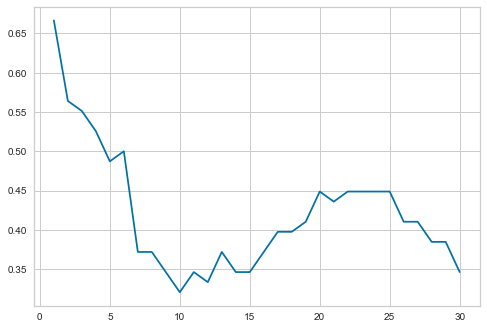

In [48]:
list_score = []
list_nn = []
for k in range(1,31):
    knc_kd = KNeighborsClassifier(n_neighbors=k,algorithm='kd_tree')
    clf = knc_kd
    clf.fit(X_train,y_train)
    y_pred=clf.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    list_score.append(acc)
    list_nn.append(k)
    print("[%d] score: {:.2f}".format(acc) % k)
    
plt.plot(list_nn, list_score)

In [49]:
knc=KNeighborsClassifier(n_neighbors=4,algorithm='brute')
knc.fit(X_train,y_train)

KNeighborsClassifier(algorithm='brute', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=4, p=2,
                     weights='uniform')

In [50]:
y_pred=knc.predict(X_test)
confusion_matrix(y_test, y_pred)

array([[ 1,  0,  0,  1,  0,  0],
       [ 2,  2,  7,  3,  0,  0],
       [ 0,  0, 25,  2,  0,  0],
       [ 0,  0,  6, 10,  0,  0],
       [ 0,  0,  5,  3,  2,  0],
       [ 0,  1,  1,  4,  2,  1]])

In [51]:
acc = accuracy_score(y_test, y_pred)
print('Accuracy =', acc)

Accuracy = 0.5256410256410257


In [52]:
from sklearn.tree import DecisionTreeClassifier
import pydotplus
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO

/anaconda3/lib/python3.7/site-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


In [53]:
clf_DT=DecisionTreeClassifier(criterion='gini',max_depth=10)
clf_DT=clf_DT.fit(X_train,y_train)

y_pred=clf_DT.predict(X_test)
score=accuracy_score(y_test,y_pred)
print(score)

0.6666666666666666


In [54]:
dot = StringIO()
export_graphviz(clf_DT, out_file = dot)
graph = pydotplus.graph_from_dot_data(dot.getvalue())
graph.write_pdf("../graph/graph_gini.pdf")

True

In [55]:
clf_DT=DecisionTreeClassifier(criterion='entropy',max_depth=10)
clf_DT=clf_DT.fit(X_train,y_train)

y_pred=clf_DT.predict(X_test)
score=accuracy_score(y_test,y_pred)
print(score)

0.717948717948718


In [56]:
dot = StringIO()
export_graphviz(clf_DT, out_file = dot)
graph = pydotplus.graph_from_dot_data(dot.getvalue())
graph.write_pdf("../graph/graph_entropy.pdf")

True